In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.27.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
opt/ibm/custom-channels/meta-wscloud/linux-64      129.0 B @   1.6MB/s  0

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# Using Ticker Function extract data
tesla = yf.Ticker("TSLA")

In [4]:
# Using the Function History
tesla_price_data = tesla.history(period="max")

In [5]:
# Reset the Index
tesla_price_data.reset_index(inplace=True)

In [6]:
# Dislay first 5 rows of data
tesla_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [7]:
# Get request for download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Sends an HTTP GET request to the URL
response = requests.get(url)

# Save the content of webpage to html_data
html_data = response.text

In [18]:

# Parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")

# Find the second <tbody> element (where the table data is located)
tbody_element = soup.find_all("tbody")[1]

# Initialize empty lists to store data
dates = []
revenues = []

# Loop through the rows in the <tbody> element
for row in tbody_element.find_all("tr"):
    # Find all the columns (cells) in each row
    columns = row.find_all("td")
    
    # Check if there are exactly 2 columns (Date and Revenue)
    if len(columns) == 2:
        date = columns[0].get_text()
        revenue = columns[1].get_text()
        
        # Append the data to the respective lists
        dates.append(date)
        revenues.append(revenue)

# Create the DataFrame
tesla_revenue = pd.DataFrame({"Date": dates, "Revenue": revenues})

# Display the first few rows of the DataFrame
print(tesla_revenue.head())

         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


In [19]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/tmp/wsuser/ipykernel_168/349343550.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


In [20]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [22]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [26]:
gamestop = yf.Ticker("GME")
# Using Ticker Function extract data

In [28]:
# Using the Function History
gme_data = gamestop.history(period="max")

In [29]:
# Reset the Index
gme_data.reset_index(inplace=True)

# Dislay first 5 rows of datagme_data.head()
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [30]:
# Get request for download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
# Sends an HTTP GET request to the URL
response = requests.get(url)

# Save the content of webpage to html_data
html_data = response.text

In [31]:
# Parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")

# Find the second <tbody> element (where the table data is located)
tbody_element = soup.find_all("tbody")[1]

# Initialize empty lists to store data
dates = []
revenues = []

# Loop through the rows in the <tbody> element
for row in tbody_element.find_all("tr"):
    # Find all the columns (cells) in each row
    columns = row.find_all("td")
    
    # Check if there are exactly 2 columns (Date and Revenue)
    if len(columns) == 2:
        date = columns[0].get_text()
        revenue = columns[1].get_text()
        
        # Append the data to the respective lists
        dates.append(date)
        revenues.append(revenue)

# Create the DataFrame
gme_revenue = pd.DataFrame({"Date": dates, "Revenue": revenues})

# Display the first few rows of the DataFrame
print(gme_revenue.head())

         Date Revenue
0  2020-04-30  $1,021
1  2020-01-31  $2,194
2  2019-10-31  $1,439
3  2019-07-31  $1,286
4  2019-04-30  $1,548


In [33]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


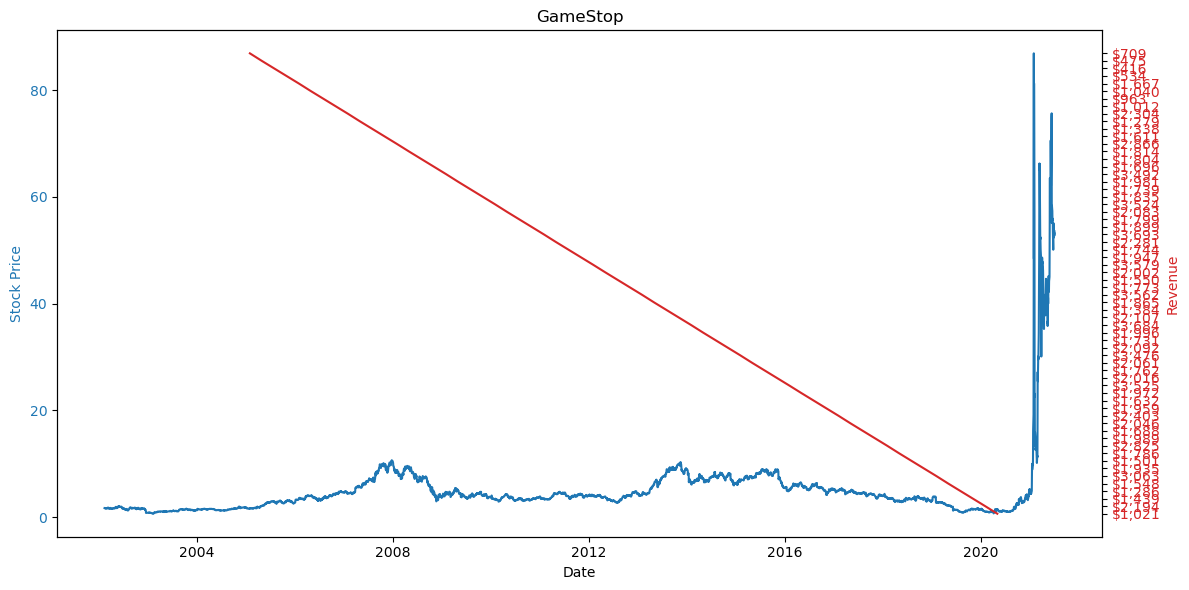

In [40]:
import matplotlib.pyplot as plt  # Import Matplotlib

def make_graph(stock_data, revenue_data, title):
    # Assuming you have stock data and revenue data with Date columns
    
    # Convert the Date column to datetime format (if it's not already)
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    
    # Filter the data to include only dates up to June 2021
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']
    
    # Create subplots
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot stock data
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='tab:blue')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis for revenue data
    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue', color='tab:red')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Add title
    plt.title(title)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

make_graph(gme_data, gme_revenue, 'GameStop')

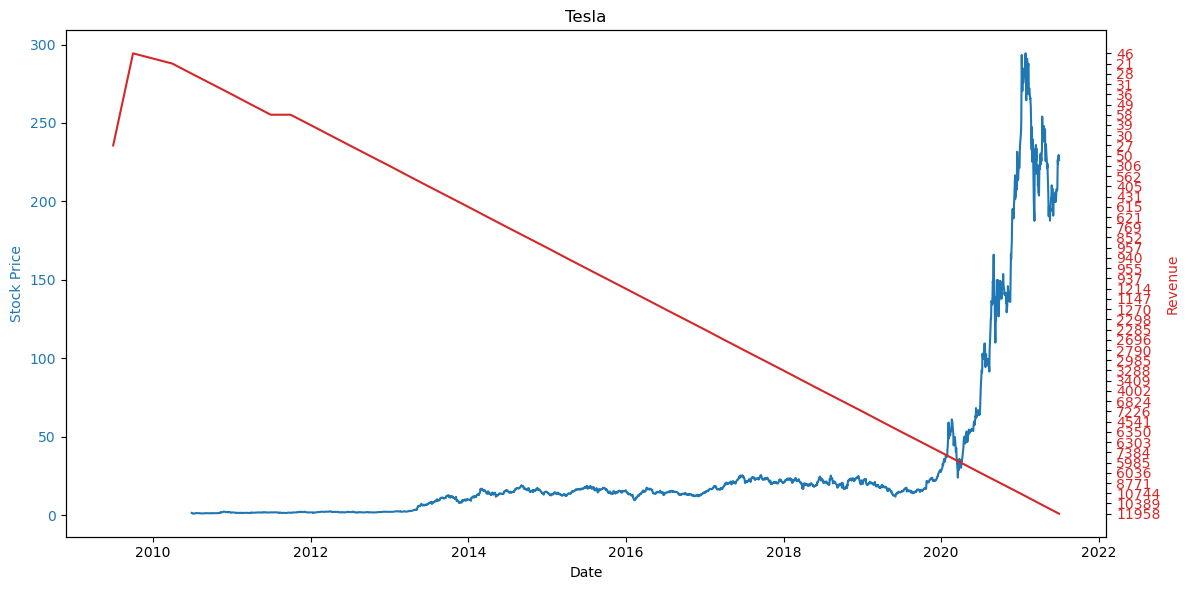

In [42]:
make_graph(tesla_price_data, tesla_revenue, 'Tesla')